## 1. Dataset 확인  
1.1 Null data check  
1.2 Target label 확인  
## 2. Exploratory data analysis
2.1 Pclass  
2.2 Sex  
2.3 Both Sex and Pclass  
2.4 Age  
2.5 Pclass, Sex, Age  
2.6 Embarked  
2.7 Family=SibSp+Parch  
2.8 Fare 
## 3. Feature Engineering
3.1 Null Date를 어떻게 채울것인가??? 이게 문제...  
3.2 Age 채우기 : Initial 별로 채우기  
3.3 Embarked Null Data 채우기  
3.4 Age에서 Age_category 만들기  
3.5 스트링데이터를 수치데이터로 바꾸기  
3.6 Initial  
3.7 Embarked

# 환경설정

In [1]:
import seaborn
seaborn.__version__

'0.12.2'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')  # white, dark, whitegrid, darkgrid, ticks
sns.set(font_scale=2.5)

import missingno as msno # 데이터셋에 null데이터를 쉽게 보여주는 lib
import warnings
warnings.filterwarnings('ignore') # 경고 무시

# 그림을 그리고 show()를 하면 새로운 창으로 뜨는 것이 아니라 바로 노트북에 볼수있게 해줌
%matplotlib inline 


# 1. Dataset 확인

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.shape # 승객은 891 인데 나이가 714 라는 말은 나이에 null이 있다는 의미

(891, 12)

In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 1.1 Null data check

In [9]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent df NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent df NaN value: 0.00%
column:   Survived	 Percent df NaN value: 0.00%
column:     Pclass	 Percent df NaN value: 0.00%
column:       Name	 Percent df NaN value: 0.00%
column:        Sex	 Percent df NaN value: 0.00%
column:        Age	 Percent df NaN value: 19.87%
column:      SibSp	 Percent df NaN value: 0.00%
column:      Parch	 Percent df NaN value: 0.00%
column:     Ticket	 Percent df NaN value: 0.00%
column:       Fare	 Percent df NaN value: 0.00%
column:      Cabin	 Percent df NaN value: 77.10%
column:   Embarked	 Percent df NaN value: 0.22%


In [10]:
df_train[col].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [11]:
df_train[col].isnull().sum()

2

In [12]:
df_train[col].shape[0]

891

In [13]:
df_train[col].isnull().sum() / df_train[col].shape[0]

0.002244668911335578

In [14]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent df NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent df NaN value: 0.00%
column:     Pclass	 Percent df NaN value: 0.00%
column:       Name	 Percent df NaN value: 0.00%
column:        Sex	 Percent df NaN value: 0.00%
column:        Age	 Percent df NaN value: 20.57%
column:      SibSp	 Percent df NaN value: 0.00%
column:      Parch	 Percent df NaN value: 0.00%
column:     Ticket	 Percent df NaN value: 0.00%
column:       Fare	 Percent df NaN value: 0.24%
column:      Cabin	 Percent df NaN value: 78.23%
column:   Embarked	 Percent df NaN value: 0.00%


<Axes: >

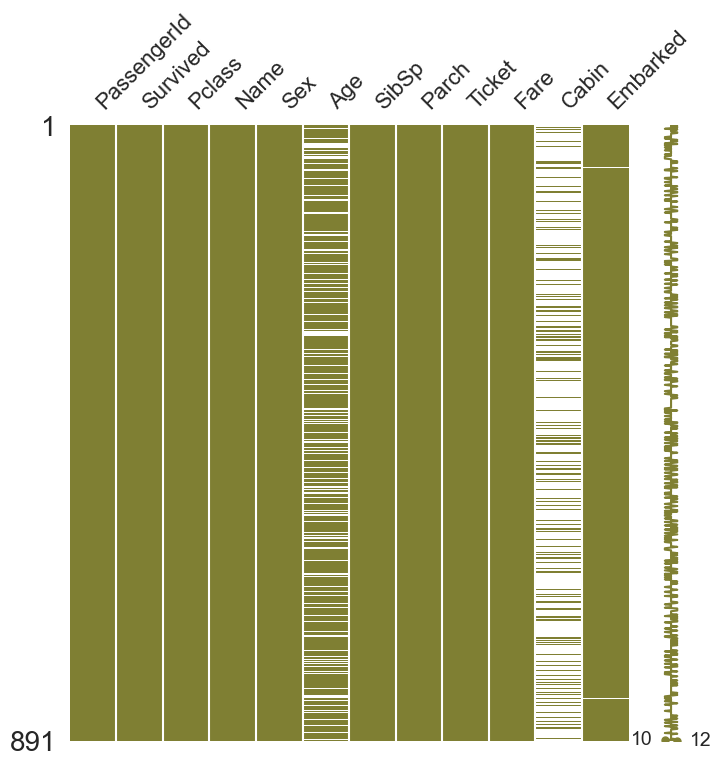

In [15]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.2))




<Axes: >

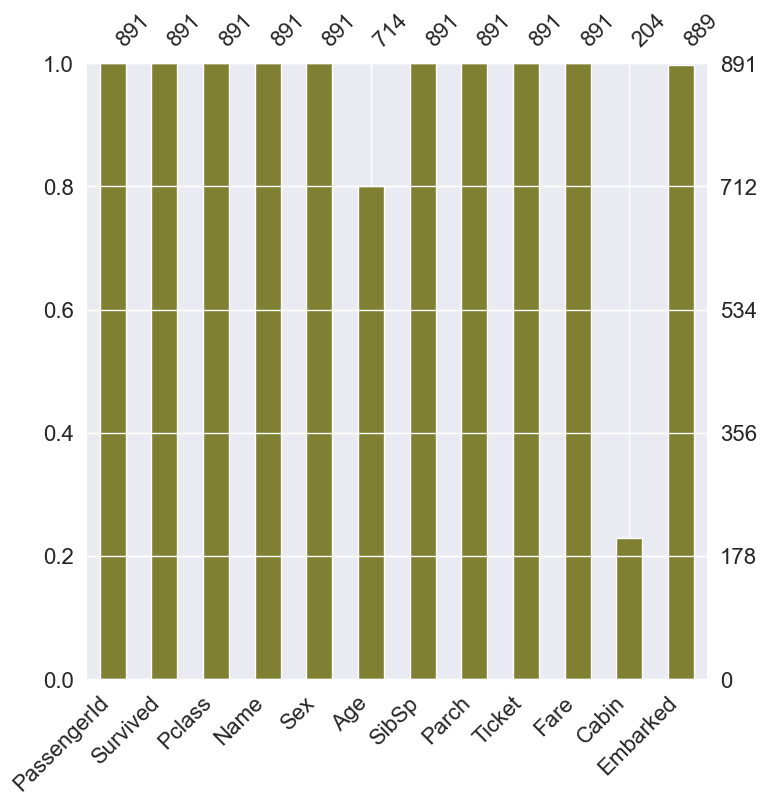

In [16]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.2))

## 1.2 Target label 확인

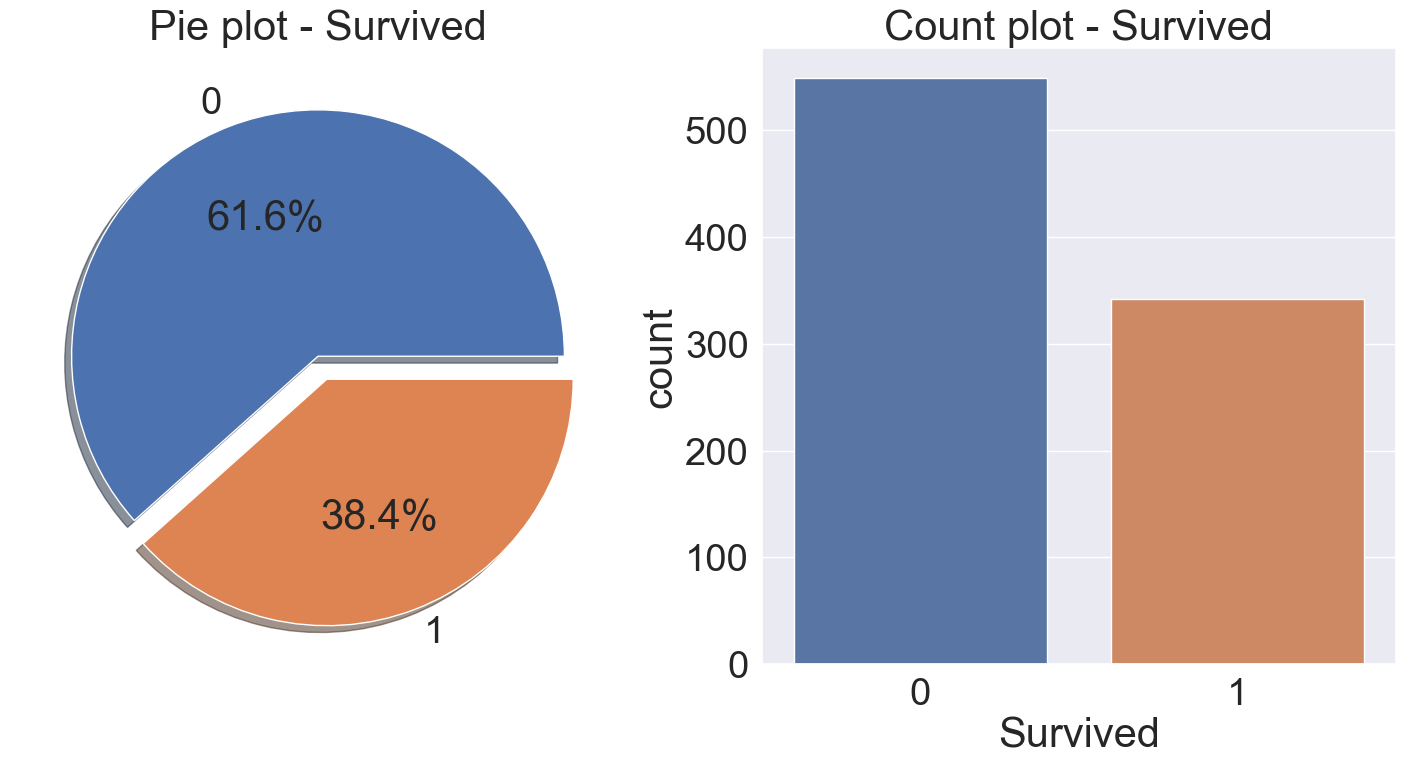

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 가로세로 1x2 개,  크기가 18x8 인 도화지 준비

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) 
# explode=[0, 0.1]: 하나는 원래 위치, 다른 하나는 10% 떨어지게...ax=ax[0] : 차트를 그릴 위치를 지정
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
# sns.countplot(x=df_train['Survived'], ax=ax[1])
sns.countplot(data=df_train, x='Survived', ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. Exploratory data analysis
## 2.1 Pclass

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df_train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

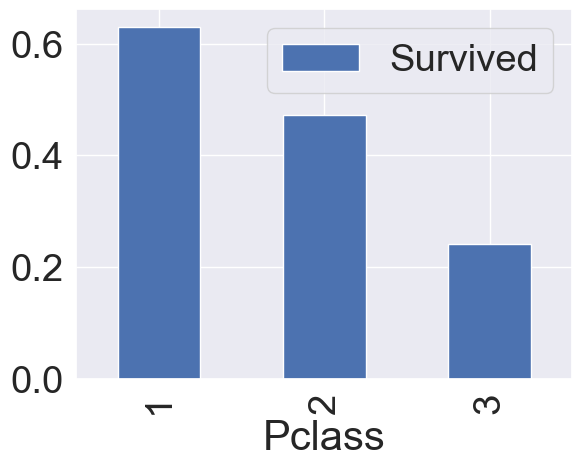

In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


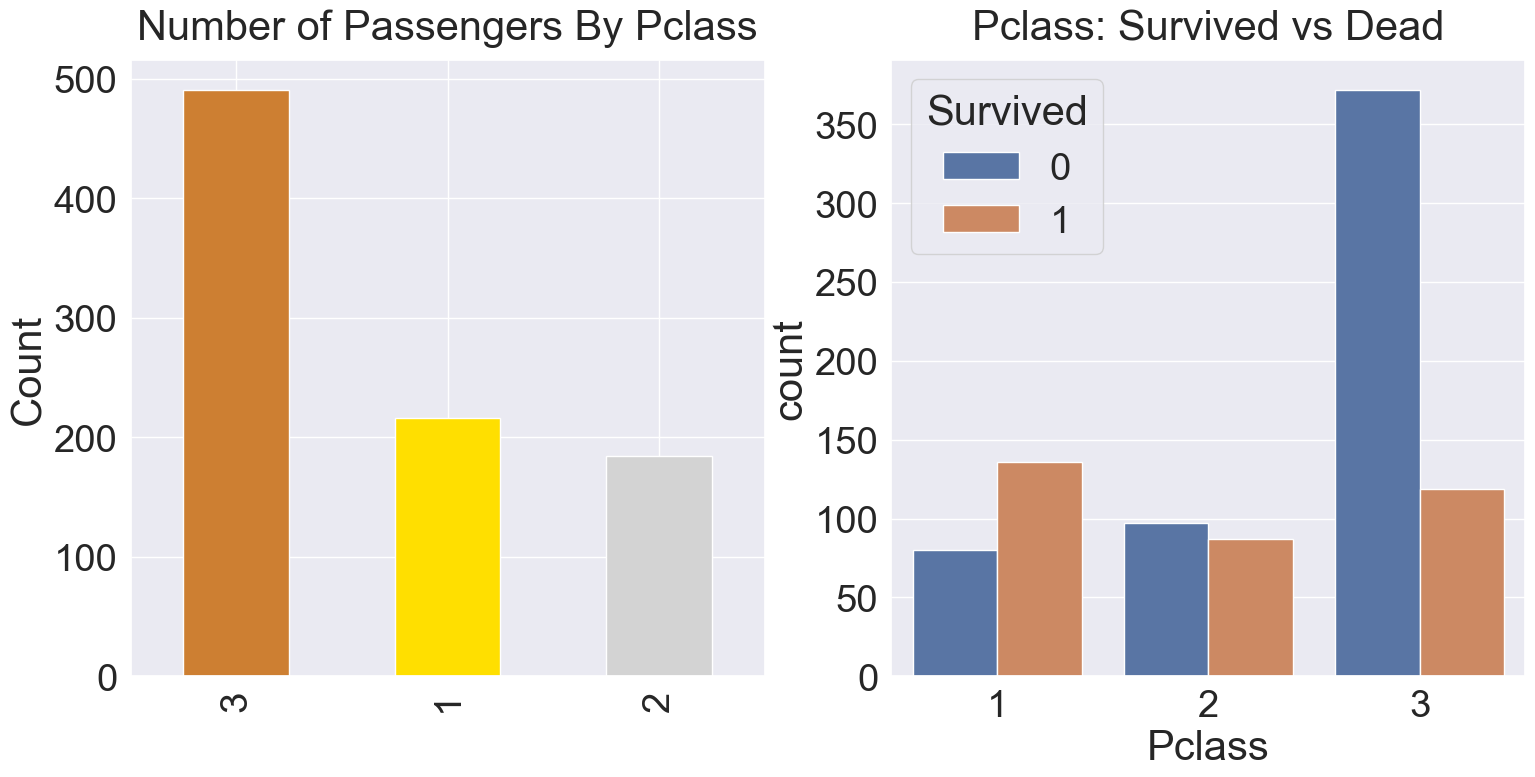

In [26]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
# sns.countplot(x=df_train['Pclass'], hue='Survived', data=df_train, ax=ax[1])
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

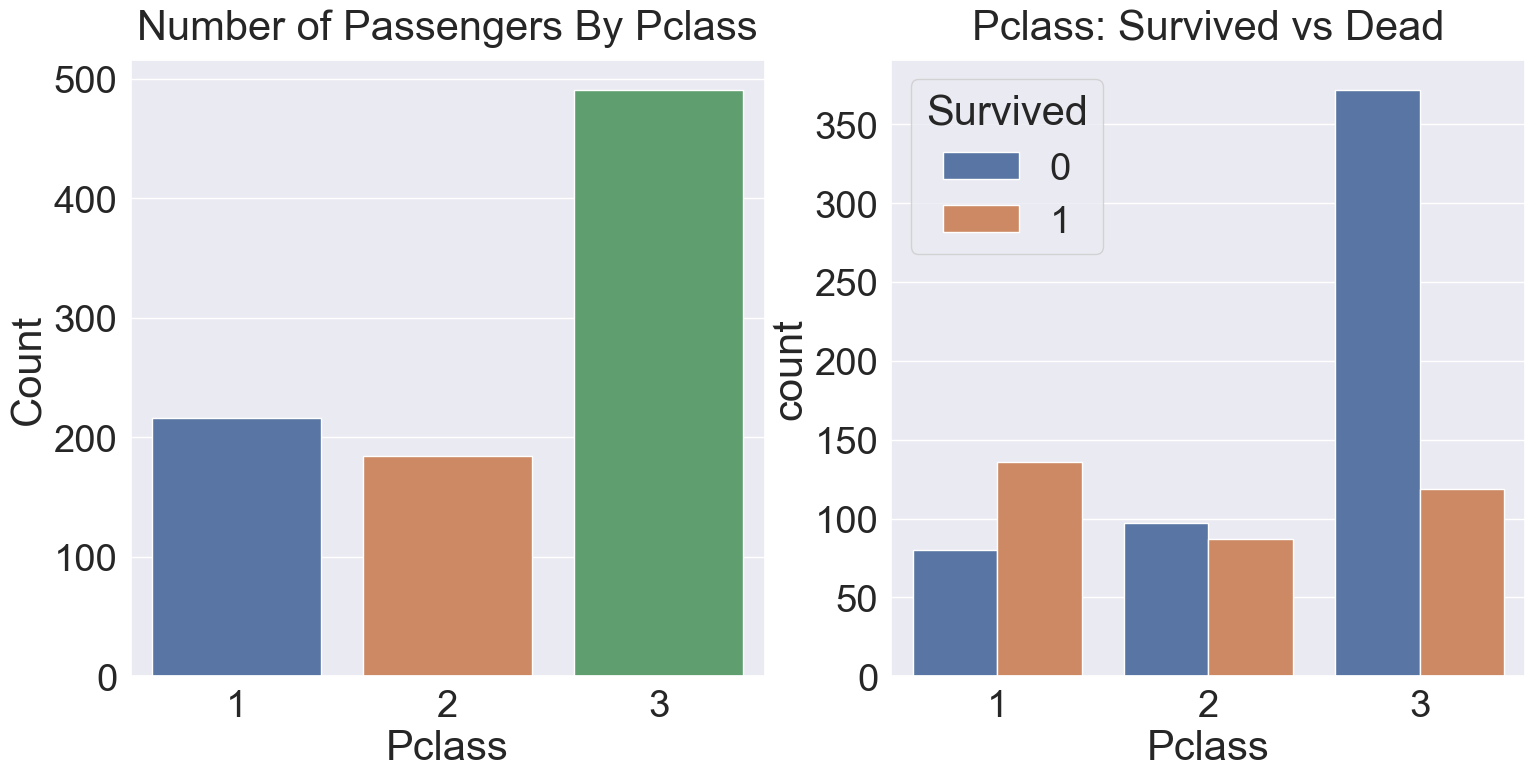

In [27]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
sns.countplot(data=df_train, x='Pclass', ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
# sns.countplot(x=df_train['Pclass'], hue='Survived', data=df_train, ax=ax[1])
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## 2.2 Sex

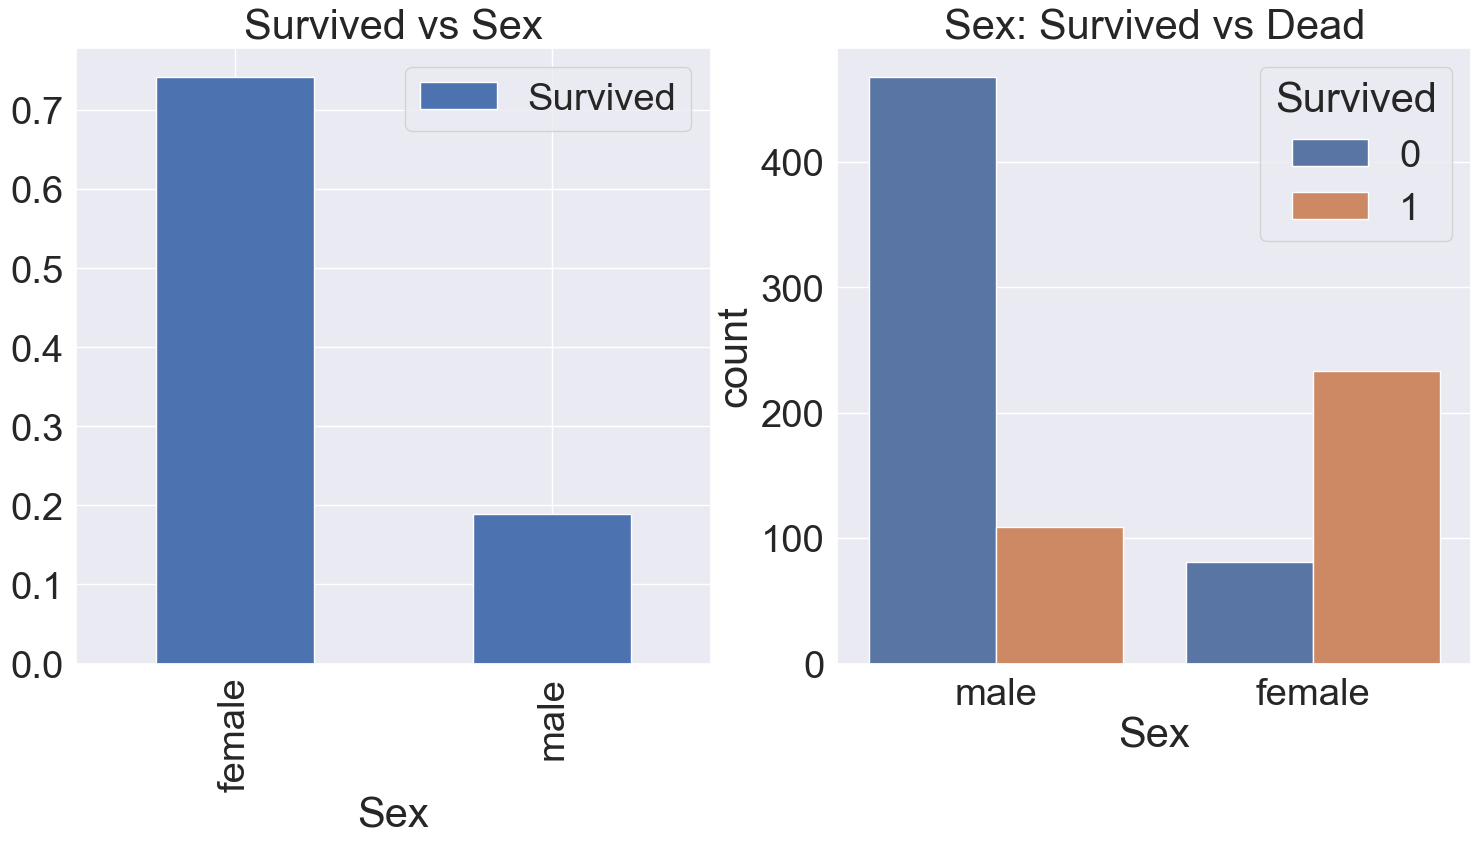

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
# sns.countplot(x=df_train['Sex'], hue='Survived', data=df_train, ax=ax[1])
sns.countplot( data=df_train, x='Sex', hue='Survived',ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [29]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [31]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## Both Sex and Pclass

<Axes: xlabel='Pclass', ylabel='Survived'>

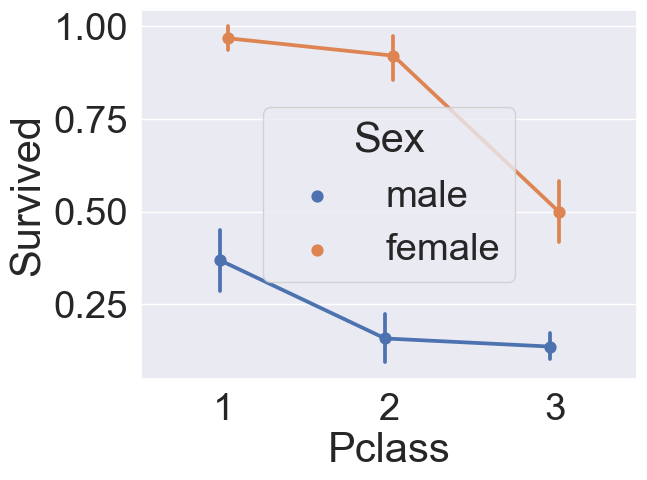

In [32]:
# sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train,size=6, aspect=1.5)
sns.pointplot(data=df_train, x="Pclass", y="Survived", hue='Sex', dodge=True)

<Axes: xlabel='Sex', ylabel='Survived'>

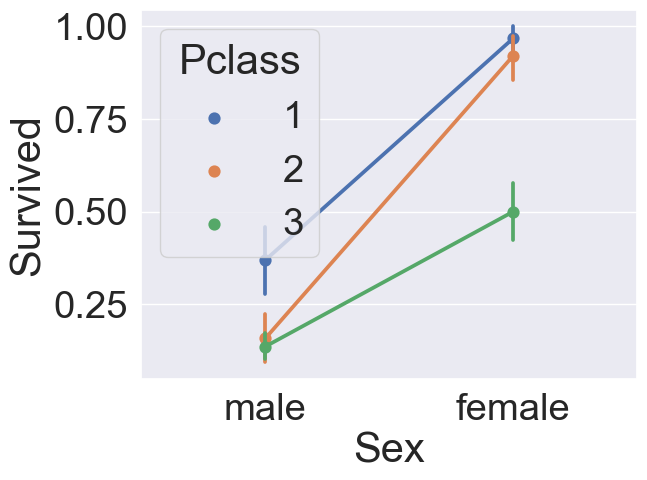

In [33]:
sns.pointplot(data=df_train, x='Sex', y='Survived', hue='Pclass')

## Age

In [34]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이: 29.7 years


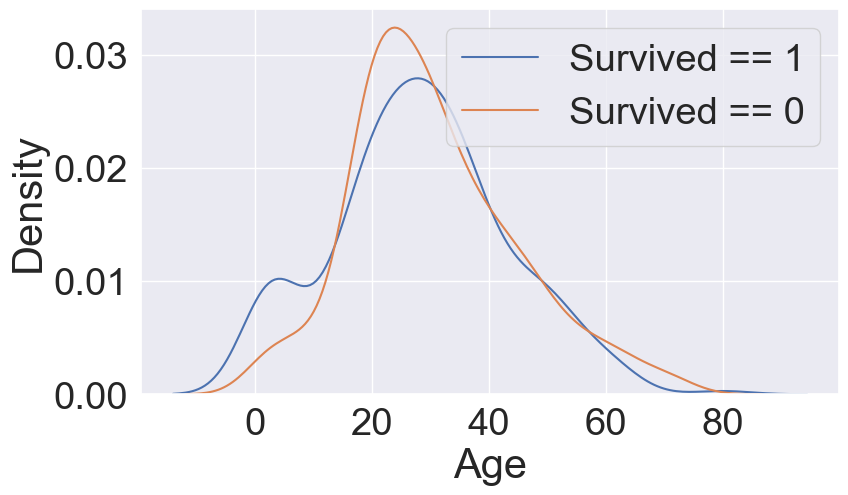

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)  # 히스토그램을 커넬 밀도 함수를 이용해서 부드럽게
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<Axes: >

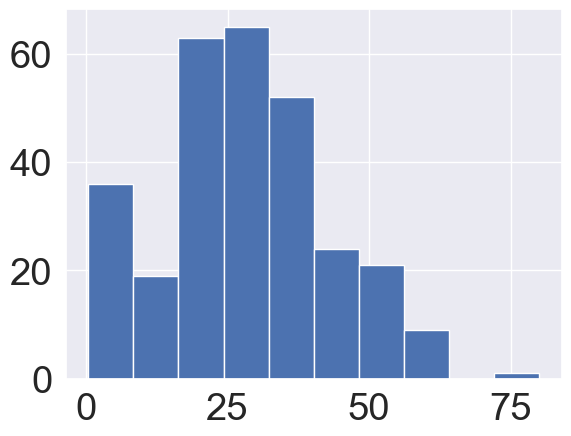

In [36]:
df_train[df_train['Survived'] == 1]['Age'].hist()  # 히스토그램

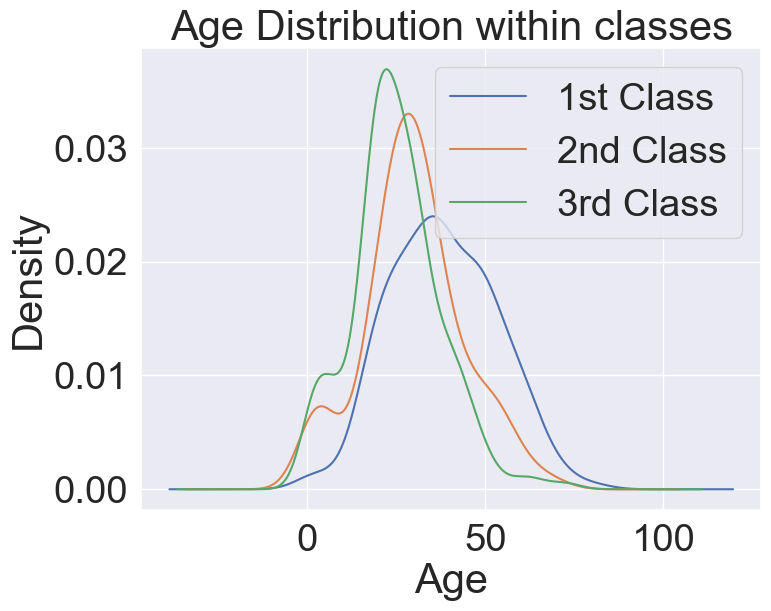

In [37]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

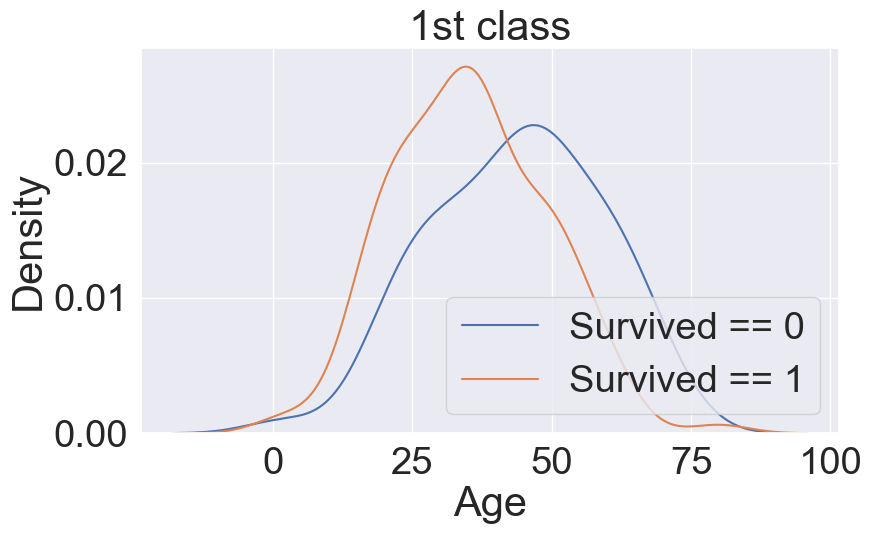

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)  
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st class')
plt.show()

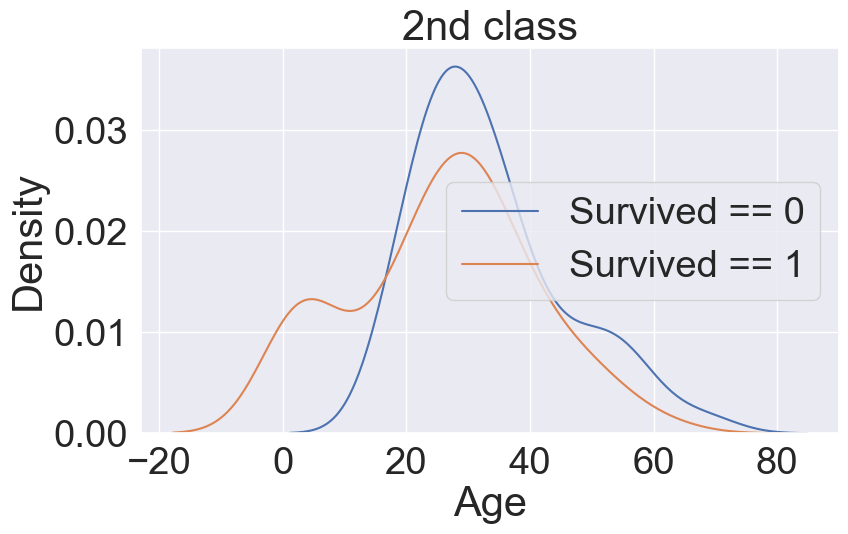

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)  
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('2nd class')
plt.show()

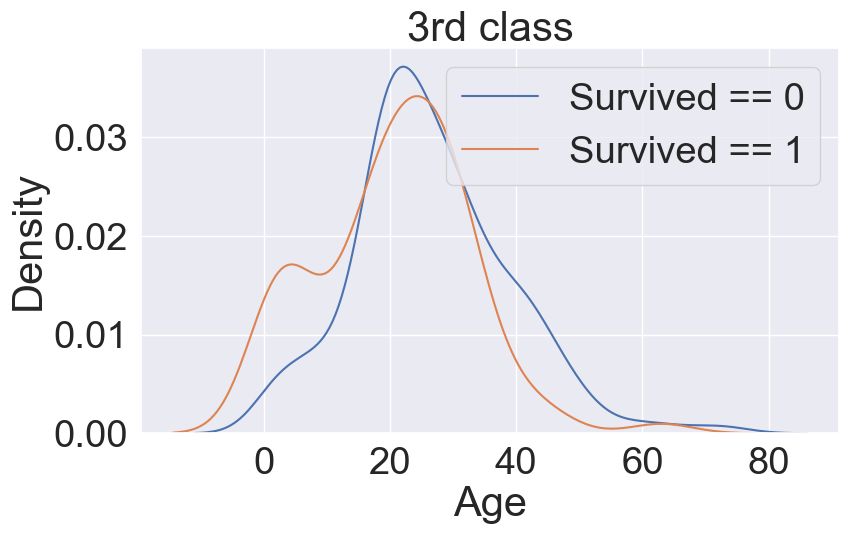

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)  
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('3rd class')
plt.show()

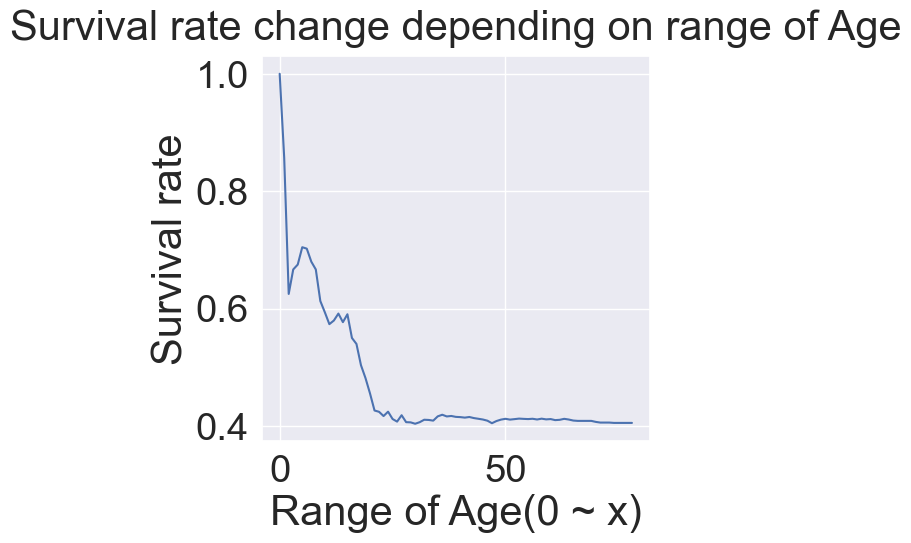

In [41]:
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
                                          
plt.figure(figsize=(5, 5))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.xlabel('Range of Age(0 ~ x)')
plt.ylabel('Survival rate')
plt.show()

In [42]:
i = 10
a = df_train[df_train['Age'] < i]['Survived'].sum()# 나이가 10살 미만의 생존자 합
b = len(df_train[df_train['Age'] < i]['Survived'])  # 나이가 10살 미만의 사람 수
a / b   # 생존율

0.6129032258064516

In [43]:
len(df_train[df_train['Age'] < i]['Survived'])  # 총길이는 62로 나타나므로 62명과 같은 수

62

In [44]:
df_train[df_train['Age'] < i]['Survived'] # 62명이  0과 1로 나타나 있으므로 sum()을 하면 32가 된다.

7      0
10     1
16     0
24     0
43     1
      ..
827    1
831    1
850    0
852    0
869    1
Name: Survived, Length: 62, dtype: int64

## Pclass, Sex, Age

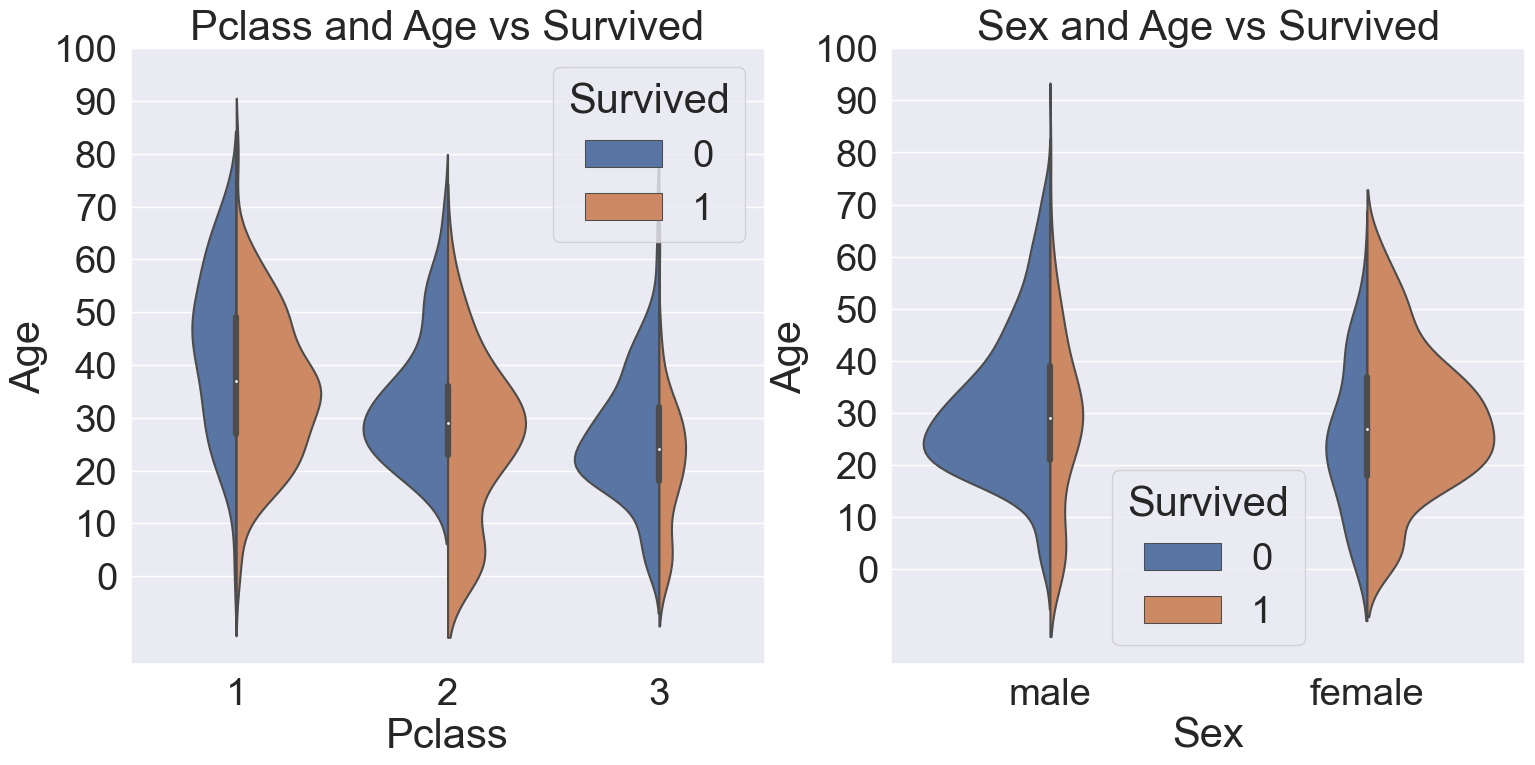

In [45]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot( data=df_train, x='Sex', y='Age', hue='Survived', scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

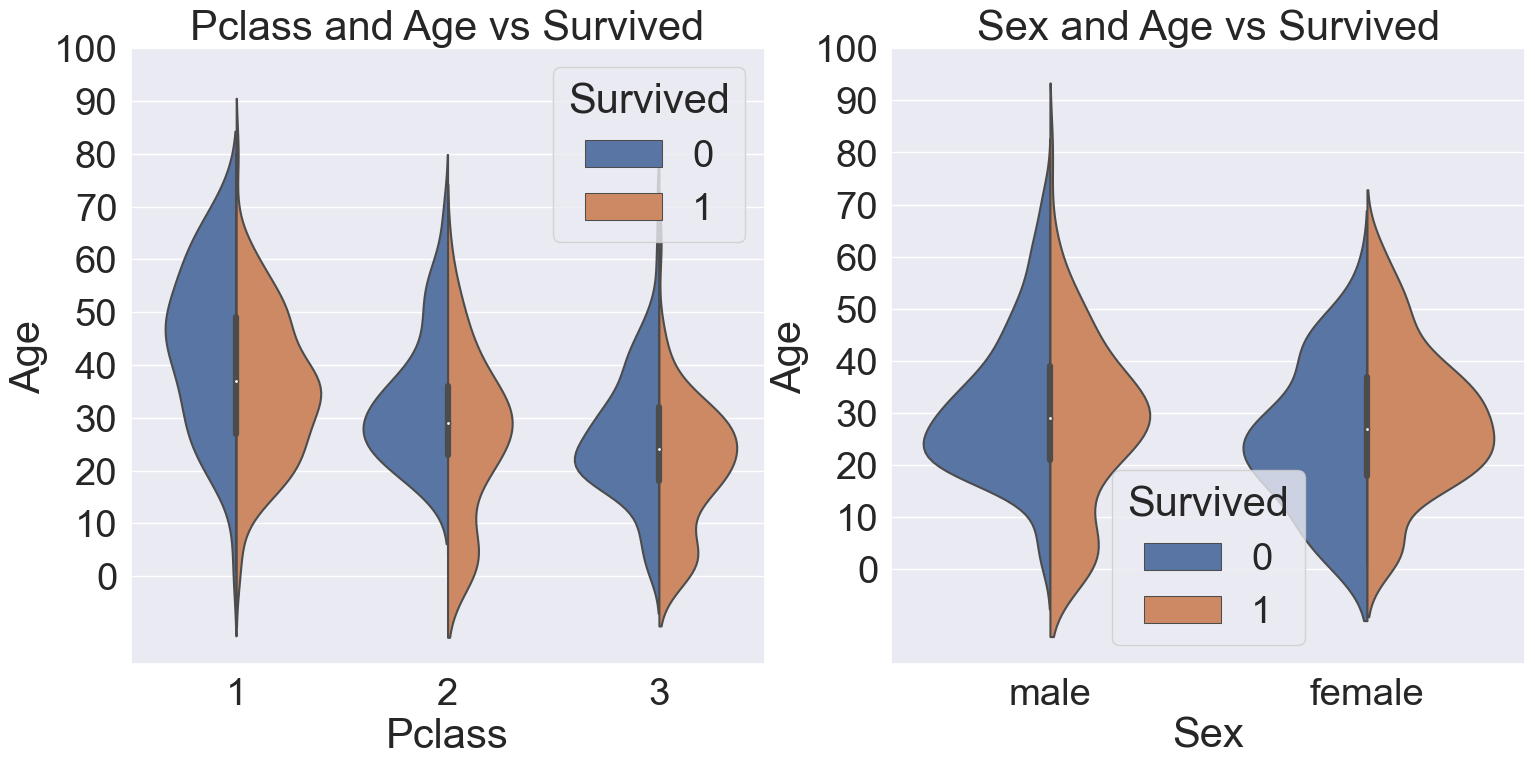

In [46]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', scale='area', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot( data=df_train, x='Sex', y='Age', hue='Survived', scale='area', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## Embarked

<Axes: xlabel='Embarked'>

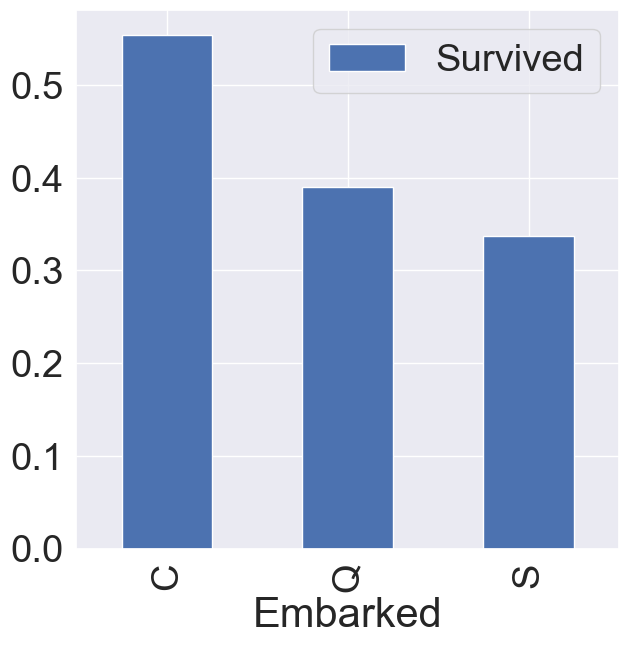

In [47]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [48]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived') # Survived 로 정렬

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [49]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()  # index로 정렬

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


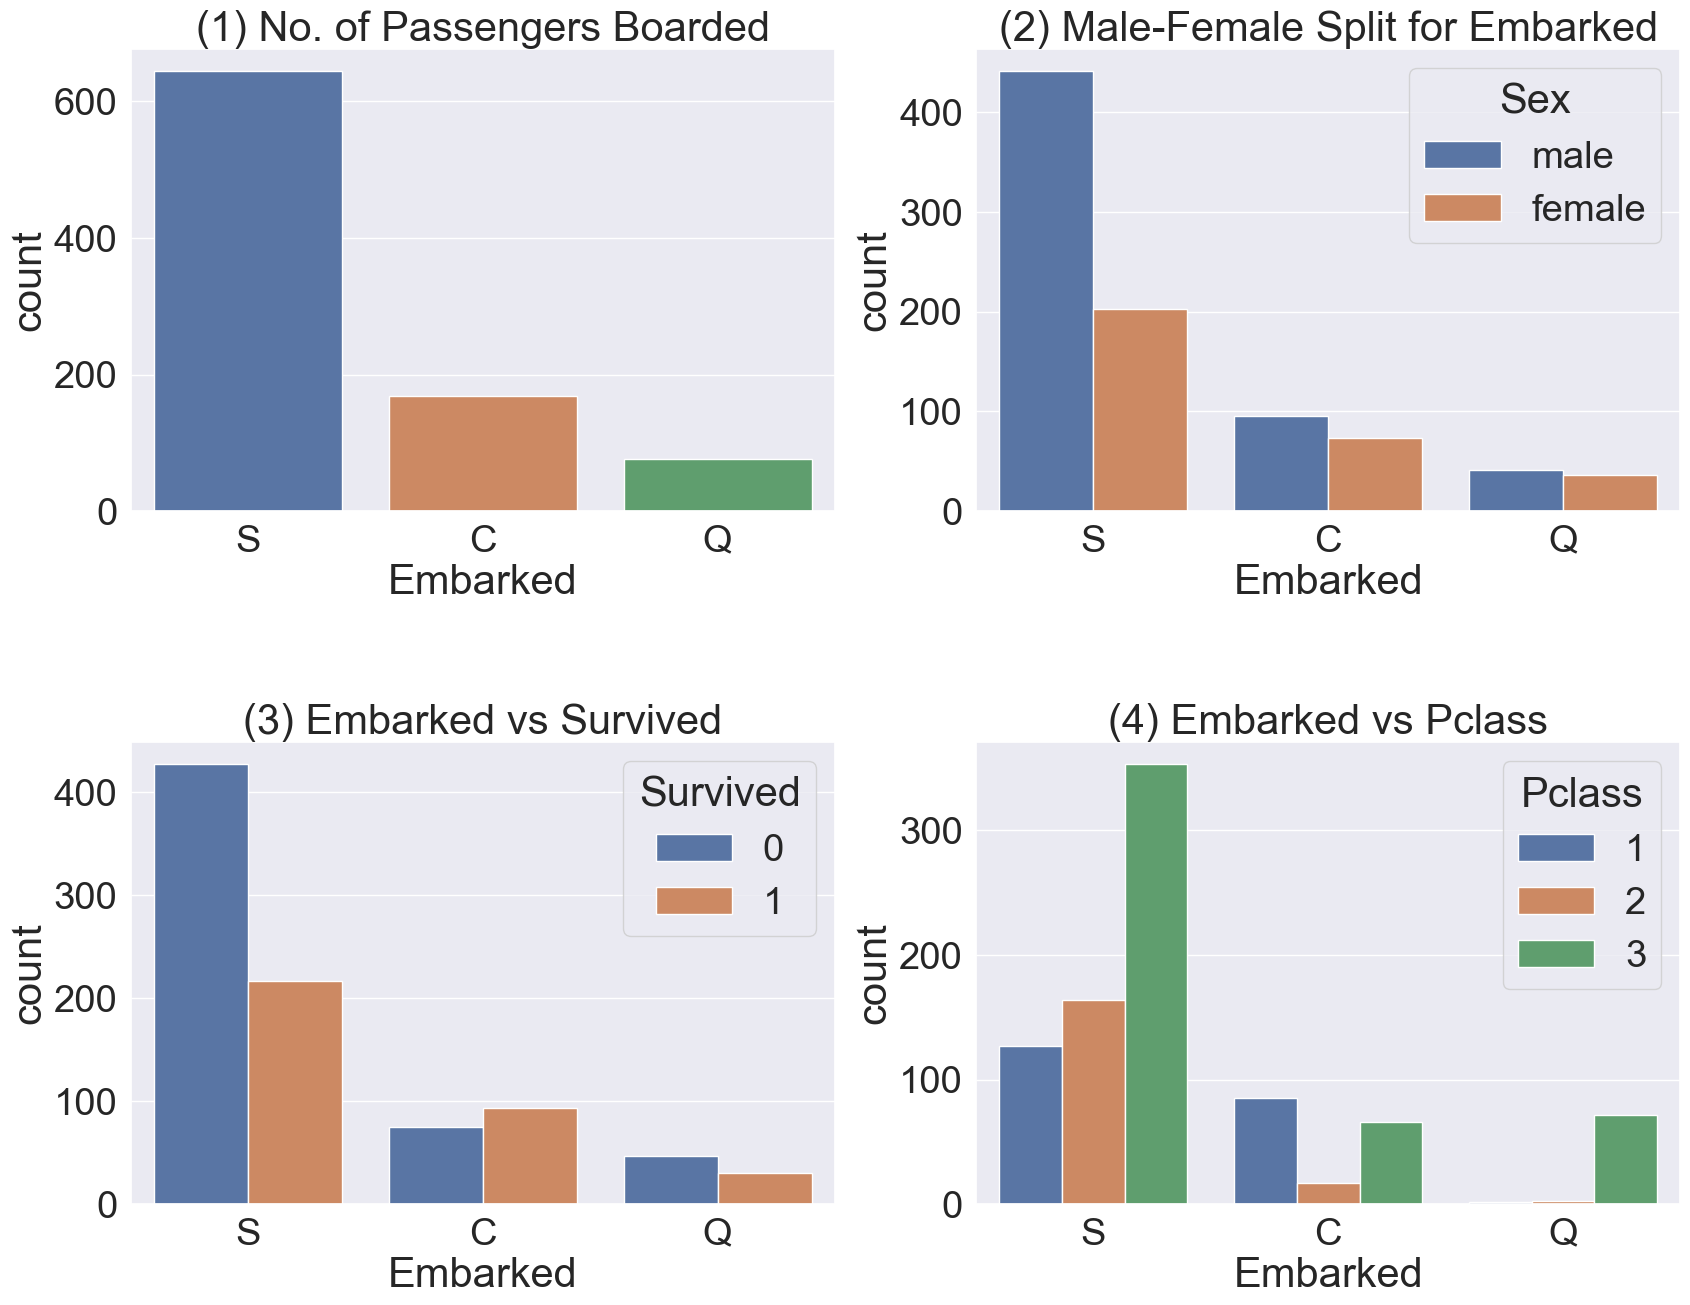

In [50]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(data=df_train, x='Embarked', ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarded')
sns.countplot(data=df_train, x='Embarked',hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot(data=df_train, x='Embarked',hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)  # 좌우간격, 상하간격을 맞춰줌
plt.show()

## Family=SibSp+Parch

In [51]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [52]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


In [53]:
df_train['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [54]:
df_train['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

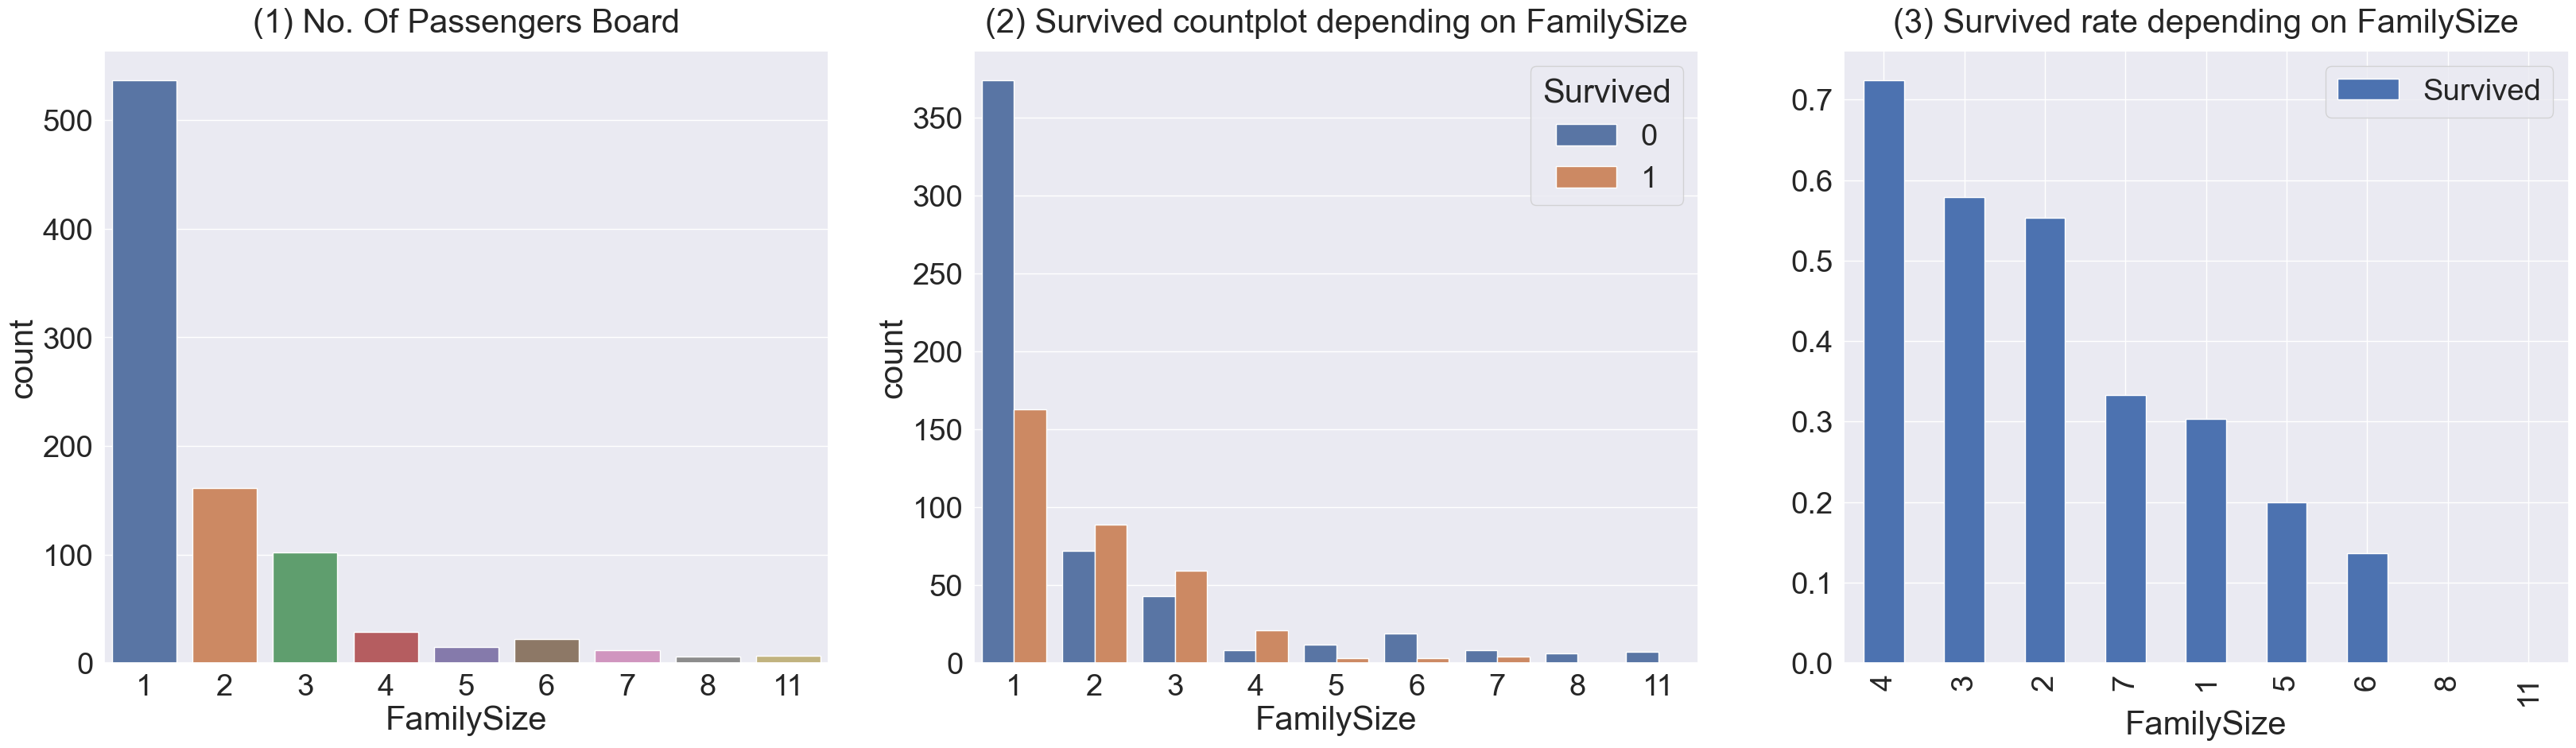

In [55]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot(data=df_train, x='FamilySize', ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Board', y=1.02)

sns.countplot(data=df_train, x='FamilySize', hue='Survived', ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Fare

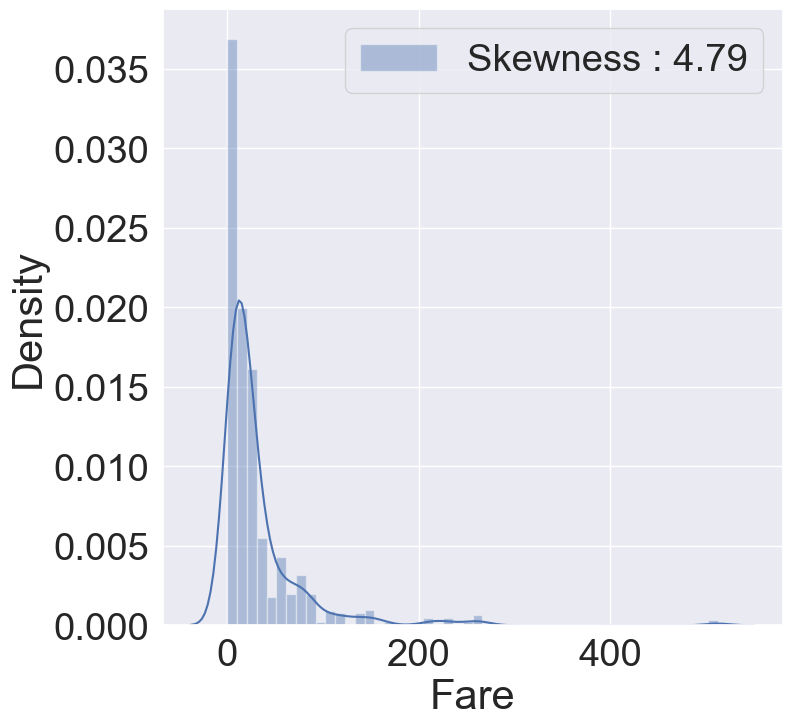

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [57]:
# 아래 줄은 뒤늦게 발견하였습니다. 13번째 강의에 언급되니, 일단 따라치시고 넘어가면 됩니다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()   # testset 에 있는 nan value 를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
# if i > 0 이면 i값에 로그를 취해주고, 아니면 0으로 반환
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [58]:
df_train['Fare']  # 이것을 기준으로 하면 위의 그래프

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

In [59]:
df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0).head(20) # 이것을 기준으로 하면 아래 그래프

0     0.683603
1     1.450832
2     0.727559
3     1.379314
4     0.735091
5     0.758536
6     1.373360
7     1.114514
8     0.879602
9     1.224820
10    1.035107
11    1.187548
12    0.735091
13    1.236291
14    0.723215
15    1.019781
16    1.215386
17    0.941939
18    1.061385
19    0.681857
Name: Fare, dtype: float64

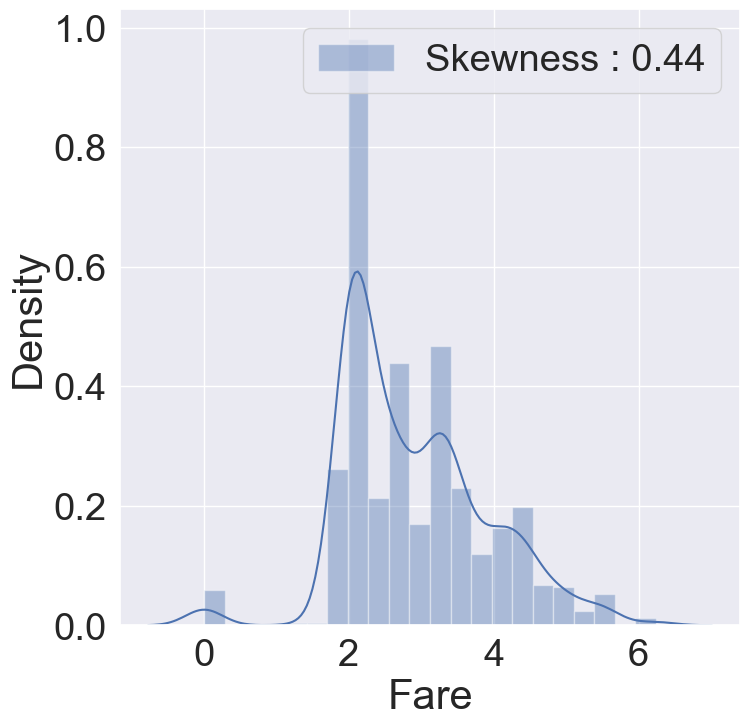

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [61]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

## Null Date를 어떻게 채울것인가??? 이게 문제...

### Age 채우기 : Initial 별로 채우기

In [62]:
df_train['Age'].isnull().sum()

177

In [63]:
df_train['Age'].mean()

29.69911764705882

In [64]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [65]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')   # 정규표현식
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [66]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [67]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [68]:
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [69]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

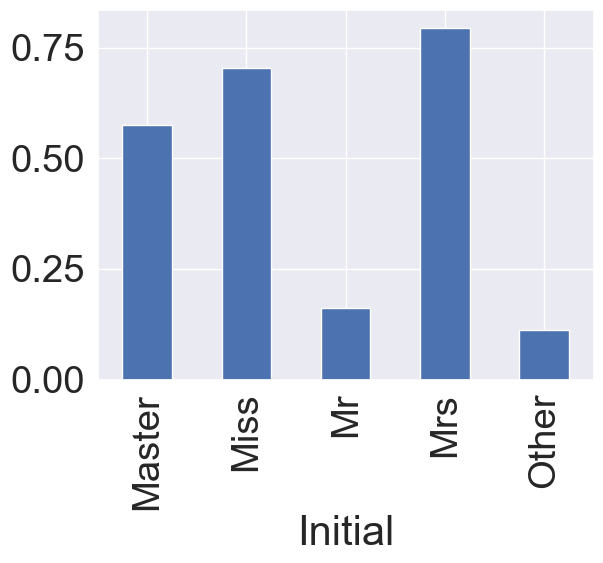

In [70]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [71]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [72]:
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Mr'), 'Age'] = 33

In [73]:
df_train.loc[(df_train['Initial'] == 'Mr'), 'Age'].isnull().sum()

0

In [74]:
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Mrs'), 'Age'] = 336
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Other'), 'Age'] = 46

df_test.loc[df_train['Age'].isnull() & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[df_train['Age'].isnull() & (df_test['Initial'] == 'Mrs'), 'Age'] = 336
df_test.loc[df_train['Age'].isnull() & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[df_train['Age'].isnull() & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[df_train['Age'].isnull() & (df_test['Initial'] == 'Other'), 'Age'] = 46

## Embarked Null Data 채우기

In [75]:
df_train['Embarked'].isnull().sum()

2

In [76]:
df_train.shape

(891, 14)

In [77]:
df_train['Embarked'].fillna('S', inplace=True)

In [78]:
df_train['Embarked'].isnull().sum()

0

### Age에서 Age_category 만들기

In [79]:
df_train['Age_cat'] = 0

In [80]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [81]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [82]:
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [83]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [84]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    

In [85]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [86]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [87]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3,3


In [88]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)   # axis=0 은 행 , axis=1 은 열
df_test.drop(['Age'], axis=1, inplace=True)

In [89]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,1,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,2,Mrs,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,1,Mr,6.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,1,Mr,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,3,Mrs,2.0


## 스트링데이터를 수치데이터로 바꾸기

### Initial

In [90]:
df_train.Initial

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

In [91]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [92]:
# df_train.loc[df_train['Initial'] == 'Master', 'Initial'] = 1 로 해도 되는데....더 쉽게...map을 이용해보면
df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})  # 이렇게 하면 끝!!!

0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Initial, Length: 891, dtype: int64

In [93]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [94]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,2,3


### Embarked

In [95]:
# 특정 컬럼에 어떤 값들이 있는지 확인하는 방법 : 2가지
df_train.Embarked.unique()   # array -- numpy

array(['S', 'C', 'Q'], dtype=object)

In [96]:
df_train['Embarked'].value_counts()  # series  -- pandas

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [97]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [98]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [99]:
df_train.Embarked.isnull().any()

False

In [100]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [101]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [102]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


### Covariance (공분산)
- 피쳐들을 수치로 만들어 놨으니 이제는 피쳐들간의 상관관계를... : 선형적 상관관계 , 즉 비례관계냐 반비례관계냐..

In [103]:
heatmap_data = df_train[[ 'Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

In [104]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Initial',
       'Age_cat'],
      dtype='object')

In [105]:
heatmap_data.corr()  # 상관관계 : 1은 비례, -1은 반비례, 0은 관계없음

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.040527
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.303021
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.042921
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.097262
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.072661
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.257096
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.518106
Age_cat,-0.040527,-0.303021,0.042921,0.097262,-0.072661,-0.257096,0.518106,1.000000


"Survived"와 "Sex" 사이의 상관관계가 -0.543351로 나타납니다. 이 값은 두 변수 사이에 부정적인 상관관계가 있음을 의미합니다. 즉, 성별이 여성일수록 생존할 가능성이 높고, 남성일수록 생존할 가능성이 낮다는 것을 나타냅니다. 마찬가지로, "Fare"와 "Pclass" 사이의 상관관계는 -0.670489로, 두 변수 사이에 강한 음의 상관관계가 있음을 나타냅니다. 이는 좌석 등급(Pclass)이 높을수록 요금(Fare)이 낮다는 것을 의미

<Axes: title={'center': 'Pearson Correalation of Feature'}>

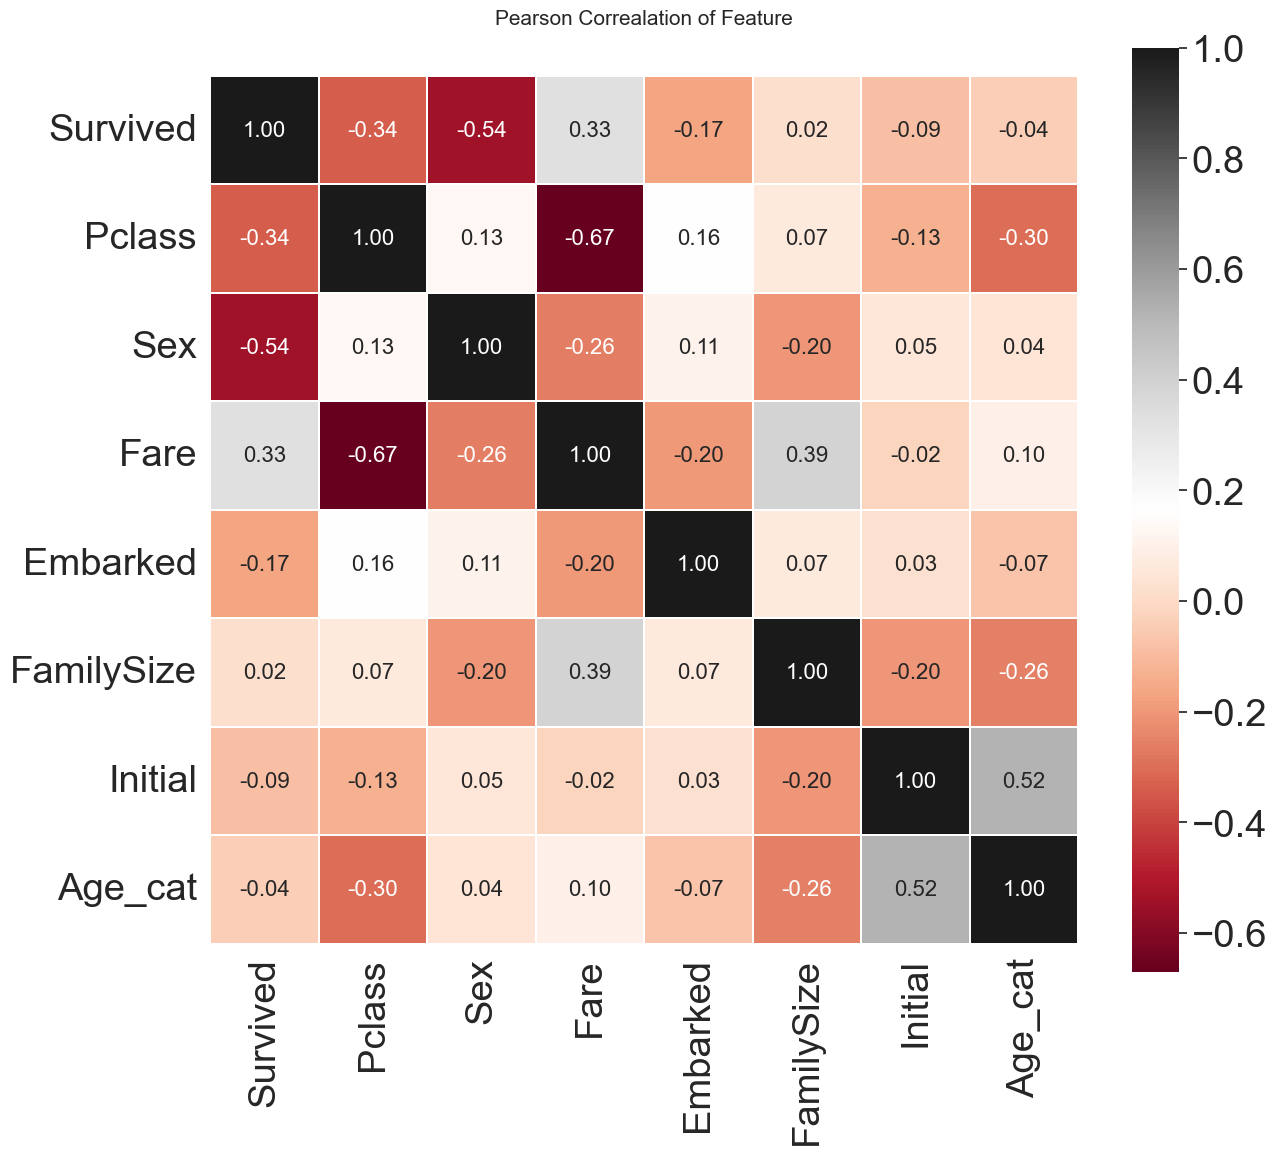

In [106]:
colormap = plt.cm.RdGy
plt.figure(figsize=(14, 12))
plt.title('Pearson Correalation of Feature', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.2f')


## One Hot Encoding
- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.
- 수치화는 간단히 Master == 0, Miss == 1, ... 등으로 매핑해주는 것을 말합니다 
- one-hot encoding 은 위 카테고리를 아래와 같이 (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것을 말합니다 g
> 이것을 간단하게 해주는 코딩 : pandas 의 get_dummies()

### Initial one-hot encoding

In [107]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [108]:
df_train['Initial'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [109]:
df_train['Initial'].isnull().sum()

0

In [110]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

### embarked one-hot encoding

In [111]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## Sklearn 들어가기 전에 컬럼에서 필요없는 것을 제거 하는 작업이 필요하다

In [112]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [113]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [114]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


# 모델 만들기

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [116]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [137]:
X_train

array([[3.        , 1.        , 1.98100147, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 4.26666208, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 0.        , 2.07002232, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [3.        , 0.        , 3.15487049, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 3.40119738, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 1.        , 2.04769284, ..., 0.        , 1.        ,
        0.        ]])

In [138]:
target_label

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [118]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

### 모델 학습시키기

In [119]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

### 예측하기

In [120]:
prediction = model.predict(X_vld)

In [121]:
# 그렇다면 prediction 에 뭐가 있을까?....--> 바로 생존 여부!!!
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [122]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.46% 정확도로 생존 맞춤


In [123]:
df_train.shape

(891, 14)

In [124]:
891*0.7


623.6999999999999

In [125]:
(prediction == y_vld).sum() / prediction.shape[0]

0.8246268656716418

In [126]:
prediction.shape[0]

268

In [127]:
(prediction == y_vld).sum()

221

## Feature importance
- 학습된 모델은 Feature importance를 가지게 되는데, 우리는 이것을 확인하여 지금 만든 모델이 어떤 feature에 영향을  
많이 받았는 지 확인할수 있다. 쉽게 말해, 10 = 4 * x1 + 2 * x2 + 1 * x3 을 생각하면 우리는 x1이 결과값(10)에 큰 영향을   
준다고 생각 할수 있습니다.  Feature importance는 여기서  4, 2, 1 을 말합니다.
- 학습된 모델은 기본적으로  feature_importance_ 를 가지고 있어서 쉽게 그 수치를 얻을 수 있습니다.

In [128]:
model.feature_importances_

array([0.08533957, 0.09678664, 0.33435722, 0.09737535, 0.12152921,
       0.01220167, 0.04360737, 0.12785599, 0.03133501, 0.00474759,
       0.01367596, 0.01258723, 0.0186012 ])

In [129]:
from pandas import Series

In [130]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

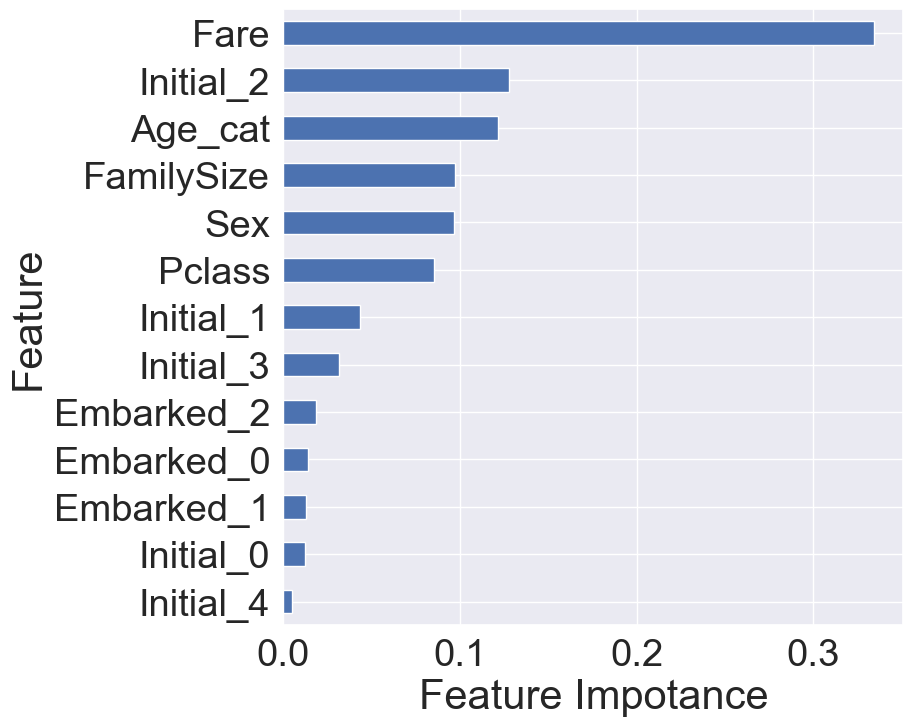

In [131]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Impotance')
plt.ylabel('Feature')
plt.show()

### submission만들고 제출...

In [ ]:
submission = pd.read_csv('../input/gender_submission.csv')

In [ ]:
prediction = model.predict(X_test)

In [ ]:
submission['Survived'] = prediction

In [ ]:
submission.to_csv('../my_first_submission.csv', index=False)